## Importing Required Libraries

In [12]:
import pandas as pd
import numpy as np
from skimage.feature import graycomatrix, graycoprops
from skimage import io, color, img_as_ubyte
import os
import cv2

In [13]:
df = pd.DataFrame(
    columns=[
        "Contrast Feature",
        "Dissimilarity Feature",
        "Homogeneity Feature",
        "Energy Feature",
        "Correlation Feature",
        "ASM Feature",
        "Mean Feature",
        "Variance Feature",
        "Standard Deviation Feature",
        "RMS Feature"
    ]
)

In [14]:
matrix1 = []

### Matrix

In [15]:
list_of_images = []
name_of_images = []
for i in range(1,4):
    path_of_images = f"/kaggle/input/imgs_part_{i}/imgs_part_{i}"
    images = os.listdir(path_of_images)
    name_of_images.extend(images)
    list_of_images.extend([os.path.join(path_of_images, img) for img in images])
    
for image in list_of_images:
    img = cv2.imread(image)
    gray = color.rgb2gray(img)
    image = img_as_ubyte(gray) 

    bins = np.array(
        [0, 16, 32, 48, 64, 80, 96, 112, 128, 144, 160, 176, 192, 208, 224, 240, 255]
    )  # 16-bit
    inds = np.digitize(
        image, bins
    )  

    max_value = inds.max() + 1
    matrix_coocurrence = graycomatrix(
        inds,
        [1],
        [0, np.pi / 4, np.pi / 2, 3 * np.pi / 4],
        levels=max_value,
        normed=False,
        symmetric=False,
    )
    matrix1.append(matrix_coocurrence)

In [16]:
CF =[]
DF =[]
HF =[]
EF =[]
COR = []
ASM = []
MF, VF, SD ,RMS = [], [], [],[]

# GLCM properties


In [17]:
def contrast_feature(matrix):
    return np.mean(graycoprops(matrix, 'contrast'))

def dissimilarity_feature(matrix):
    return np.mean(graycoprops(matrix, 'dissimilarity'))

def homogeneity_feature(matrix):
    return np.mean(graycoprops(matrix, 'homogeneity'))

def energy_feature(matrix):
    return np.mean(graycoprops(matrix, 'energy'))

def correlation_feature(matrix):
    return np.mean(graycoprops(matrix, 'correlation'))

def asm_feature(matrix):
    return np.mean(graycoprops(matrix, 'ASM'))
    
def mean_feature(matrix):
    return np.mean(matrix)

def variance_feature(matrix):
    return np.var(matrix)

def sd_feature(matrix):
    return np.std(matrix)
    
def rms_feature(matrix):
    return np.sqrt(np.mean(np.square(matrix)))
    
for matrix in matrix1:
    CF.append(contrast_feature(matrix))
    DF.append(dissimilarity_feature(matrix))
    HF.append(homogeneity_feature(matrix))
    EF.append(energy_feature(matrix))
    COR.append(correlation_feature(matrix))
    ASM.append(asm_feature(matrix))
    MF.append(mean_feature(matrix))
    VF.append(variance_feature(matrix))
    SD.append(sd_feature(matrix))
    RMS.append(rms_feature(matrix))

In [18]:
df["Contrast Feature"] = CF
df["Dissimilarity Feature"] = DF
df["Homogeneity Feature"] = HF
df["Energy Feature"] = EF
df["Correlation Feature"] = COR
df["ASM Feature"] = ASM
df["Mean Feature"] = MF
df["Variance Feature"] = VF
df["Standard Deviation Feature"] = SD
df["RMS Feature"] = RMS

In [19]:
df.index = name_of_images
df.index.name = "img_id"

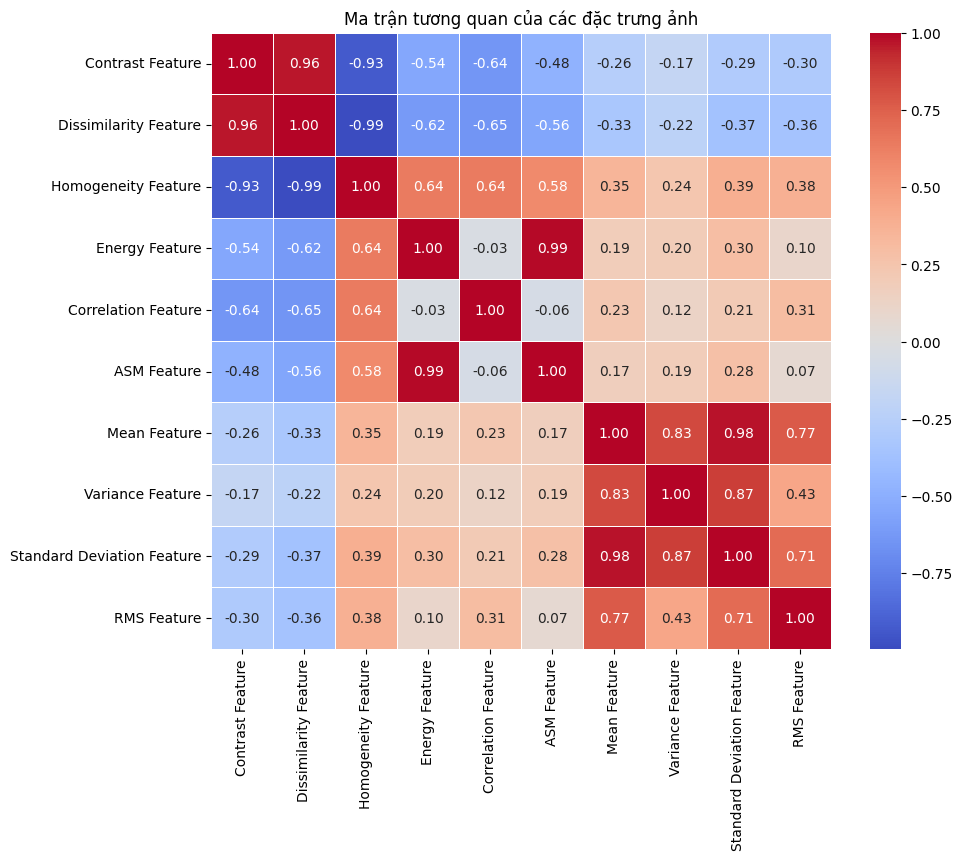

In [20]:
df
import matplotlib.pyplot as plt
import seaborn as sns
corr_matrix = df.corr()
df = pd.DataFrame(corr_matrix)
df.to_csv("corr_matrix.csv", index=False)
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Ma trận tương quan của các đặc trưng ảnh")
plt.show()

In [21]:
df.to_csv("Feature Extraction.csv")

In [22]:
# dfMetaData = pd.read_csv("/kaggle/input/skin-cancer/metadata.csv")
# dfMetaData = dfMetaData.drop(['lesion_id', 'smoke', 'drink','background_father','background_mother','age','pesticide','gender','skin_cancer_history','cancer_history','has_piped_water','has_sewage_system','fitspatrick','region','diameter_1','diameter_2','itch','grew','hurt','changed','bleed','elevation','biopsed'], axis=1)
# dfMerge = pd.merge(dfMetaData, df, on='img_id', how='inner')
# columns = [col for col in dfMerge.columns if col != 'diagnostic']
# dfMerge = dfMerge[columns + ['diagnostic']]
# dfMerge.to_csv("Result.csv")
# dfMerge

# meta_df = pd.read_csv("/kaggle/input/skin-cancer/metadata.csv")
# meta_df = meta_df.drop('diagnostic', axis=1)
# merged_df = pd.merge(meta_df, dfMerge, on="patient_id", how="inner")
# merged_df.to_csv("Meta_result.csv")